In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline



In [4]:
path =r"/content/oil_exxon.xlsx"
price_data = pd.read_excel(path)
#First 5 Rows , Index starts from 0
price_data.head()
#Date should be our Index
price_data.index=pd.to_datetime(price_data['date'])
price_data.head()

,date,exon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [5]:
price_data.dtypes


date          datetime64[ns]
exon_price           float64
oil_price            float64
dtype: object

In [6]:
new_column_names={'exon_price':'exxon price'}
price_data=price_data.rename(columns=new_column_names)
price_data.head()

,date,exxon price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [7]:
#Missing the Values
# Drop the values
price_data.isna().any()
#Display Function
display(price_data.isna().any())
price_data=price_data.dropna()
display(price_data.isna().any())

date           False
exxon price    False
oil_price       True
dtype: bool

date           False
exxon price    False
oil_price      False
dtype: bool

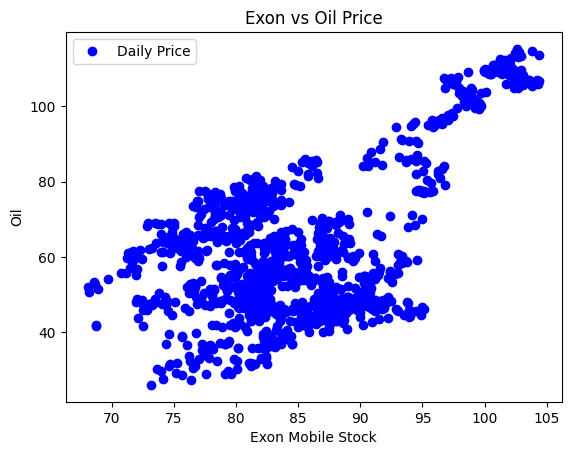

In [8]:
#Building a Scatter Plot
x=price_data['exxon price']
y=price_data['oil_price']
plt.plot(x,y,'o',color='blue',label='Daily Price')
plt.title('Exon vs Oil Price')
plt.xlabel("Exon Mobile Stock")
plt.ylabel("Oil")
plt.legend()
plt.show()

In [9]:
price_data.corr()

<ipython-input-9-26c37474eae6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_data.corr()


,exxon price,oil_price
exxon price,1.00000,0.60132
oil_price,0.60132,1.00000


In [10]:
#Statistical Summary
price_data.describe()

,exxon price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'exxon price'}>],
       [<Axes: title={'center': 'oil_price'}>, <Axes: >]], dtype=object)

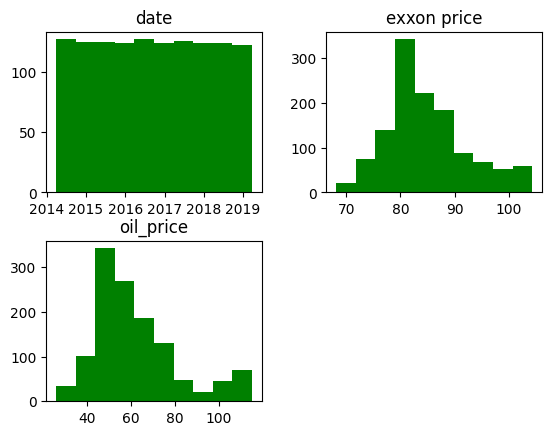

In [11]:
#Histogram Dataset
price_data.hist(grid=False,color='green')


In [12]:
#Kurtosis and Skewness
exxon_kurtosis=kurtosis(price_data['exxon price'],fisher=True)
display("Exxon Kurtosis :{:.2}".format(exxon_kurtosis))
oil_kurtosis=kurtosis(price_data['oil_price'],fisher=True)
display("Oil Kurtosis :{:.2}".format(oil_kurtosis))
exxon_skew=skew(price_data['exxon price'])
display("Exxon Skewness :{:.2}".format(exxon_skew))
oil_skew=skew(price_data['oil_price'])
display("Oil Skewness :{:.2}".format(oil_skew))


'Exxon Kurtosis :0.088'

'Oil Kurtosis :0.53'

'Exxon Skewness :0.66'

'Oil Skewness :1.0'

In [13]:
#Kurtosis Testing
display('Exon Mobiles')
display(stats.kurtosistest(price_data['exxon price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))
#Skew Testing
display('Exon Mobiles')
display(stats.skewtest(price_data['exxon price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))



'Exon Mobiles'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exon Mobiles'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

In [14]:
# define our input variable (X) & output variable.
Y = price_data[['exxon price']]
X = price_data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [15]:
y_train

,exxon price
date,
2015-12-11,74.339996
2018-09-18,83.629997
2018-05-02,76.800003
2015-07-20,81.760002
2016-05-12,89.669998
...,...
2017-02-01,82.940002
2017-11-01,83.870003
2018-08-10,79.419998


In [16]:
X_train=np.array(X_train).reshape(-1,1)
X_train

array([[ 36.99],
       [ 79.25],
       [ 73.14],
       [ 56.42],
       [ 46.43],
       [ 57.34],
       [ 56.18],
       [ 75.35],
       [ 61.37],
       [ 50.56],
       [113.62],
       [109.71],
       [ 59.73],
       [ 73.79],
       [ 44.23],
       [ 54.55],
       [ 53.2 ],
       [ 71.99],
       [ 57.73],
       [104.02],
       [ 36.61],
       [ 57.83],
       [ 35.92],
       [ 56.36],
       [ 47.95],
       [ 54.12],
       [113.15],
       [ 37.49],
       [103.37],
       [ 62.58],
       [ 67.37],
       [ 55.73],
       [109.21],
       [ 72.11],
       [ 28.82],
       [ 55.07],
       [ 45.91],
       [ 50.58],
       [105.77],
       [ 54.2 ],
       [ 55.04],
       [105.7 ],
       [ 81.35],
       [ 63.81],
       [ 54.8 ],
       [ 54.97],
       [ 47.77],
       [ 65.55],
       [ 81.87],
       [ 61.5 ],
       [ 64.51],
       [ 46.04],
       [ 44.46],
       [ 79.43],
       [ 52.28],
       [ 65.62],
       [ 39.69],
       [104.73],
       [ 96.43

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# let's grab the coefficient of our model and the intercept.
intercept = lr.intercept_[0]
coefficient = lr.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [19]:
prediction =lr.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 85.95


In [20]:
# Get multiple predictions.
y_predict = lr.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

In [21]:
# define our intput
X2 = sm.add_constant(X)
# create a OLS model.
model = sm.OLS(Y, X2)
# fit the data
est = model.fit()

In [22]:
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [23]:
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [24]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.4
MAE 5.03
RMSE 6.2


In [25]:

model_r2 = r2_score(y_test, y_predict)
print("R^2: {:.2}".format(model_r2))

R^2: 0.31


In [26]:
#Summary Of Model Output
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.42e-123
Time:                        12:40:43   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

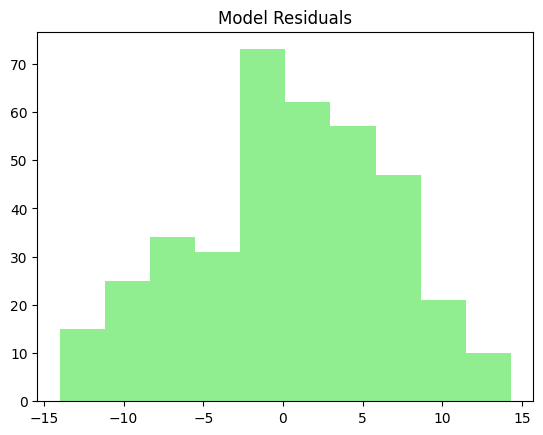

In [27]:
(y_test - y_predict).hist(grid = False, color = 'lightgreen')
plt.title("Model Residuals")
plt.show()

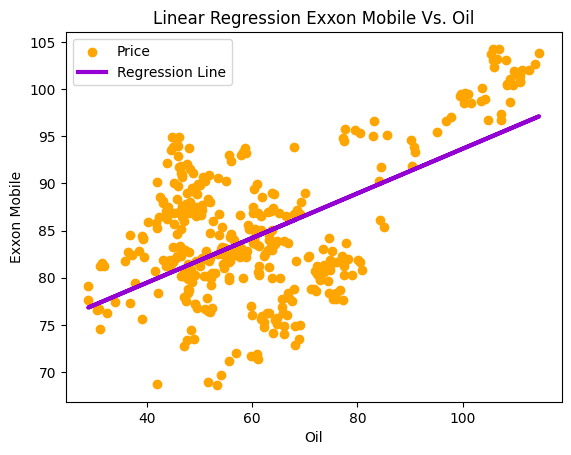

Oil coefficient:0.24
Mean squared error: 38.44
Root Mean squared error: 6.2
R2 score: 0.31


In [28]:
plt.scatter(X_test, y_test,  color='orange', label = 'Price')
plt.plot(X_test, y_predict, color='darkviolet', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(lr.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))